In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tqdm import tqdm

import sys
sys.path += ['../']
from utils.lr_finder import LRFinder

# Fake Model for Quick POC

2022-11-05 14:20:36.097310: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-05 14:20:36.104648: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


LRFinder: Finding `best_base_lr` range from: [1e-06(0.00000100), 1e-02(0.01318229)]...


LRFinder: logging loss:  94%|█████████▍| 378/400 [00:00<00:00, 619.85it/s]

LRFinder: best_base_lr = 3e-03(0.00349295)
Epoch 1/5
50/50 [==============================] - 0s 4ms/step - loss: 0.0842 - val_loss: 0.0841
Epoch 2/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0834 - val_loss: 0.0842
Epoch 3/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0836 - val_loss: 0.0877
Epoch 4/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0879 - val_loss: 0.0842
Epoch 5/5
50/50 [==============================] - 0s 2ms/step - loss: 0.1419 - val_loss: 0.1022


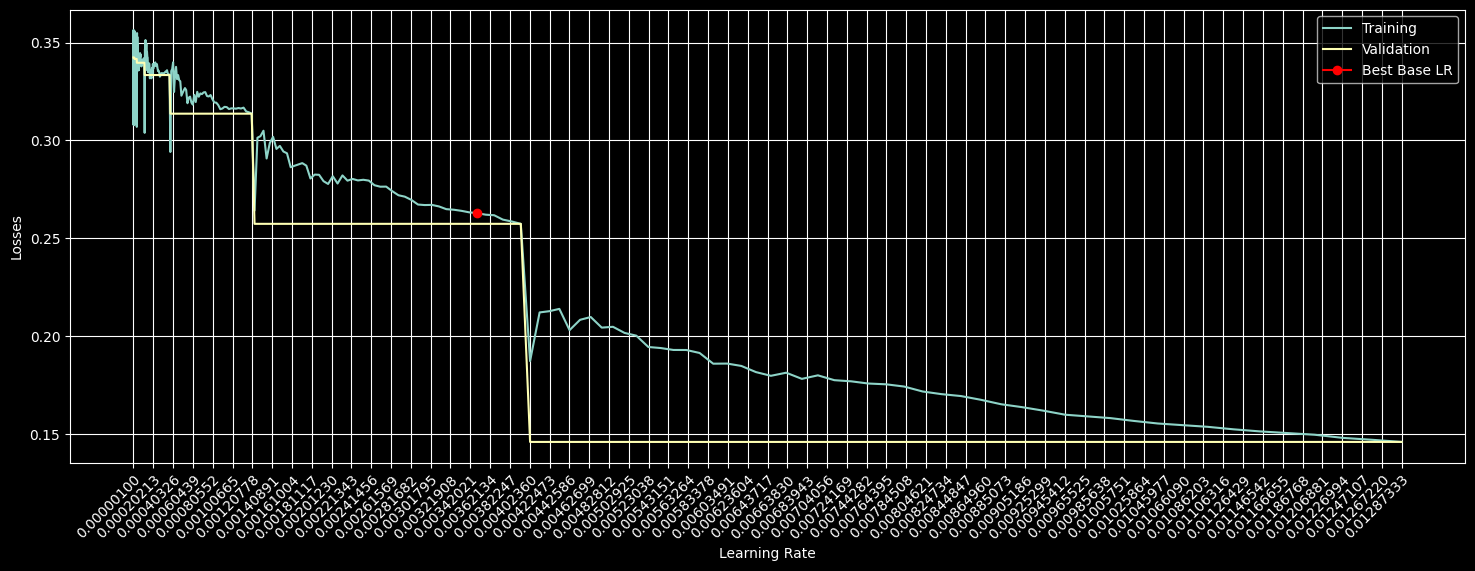

In [3]:
np.random.seed(43)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

epoch = 5
batch_size = 32
sample_size = 50
train_data = tf.data.Dataset.from_tensor_slices((np.zeros((sample_size, batch_size, 10, 3)),np.random.rand(sample_size, batch_size, 1)))
test_data = tf.data.Dataset.from_tensor_slices((np.zeros((sample_size, batch_size, 10, 3)), np.random.rand(sample_size, batch_size, 1)))

callbacks = [LRFinder(train_data, batch_size, window_size=4, max_steps=400, filename='logs/lr_finder')]
lr_decayed_fn = tf.keras.optimizers.schedules.CosineDecay((4,400), epoch * len(train_data), alpha=1e-2)
opt = tf.keras.optimizers.Adam(learning_rate=lr_decayed_fn, beta_1=0.9, beta_2=0.98, epsilon=1e-09)
model.compile(optimizer=opt, loss='mse')

model.fit(train_data, validation_data=test_data, batch_size=batch_size, epochs=5, callbacks=callbacks)

# Real Model for Validation and Test

Num Replicas In Sync:  1


2022-11-05 14:29:16.395618: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".







Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 42.48 url/s]





Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 39.61 url/s]














































































































































































































































































































































































Dataset msra_dataset downloaded and prepared to ~/tensorflow_datasets/msra_dataset/0.1.1. Subsequent calls will reuse this data.


2022-11-05 14:30:00.932064: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Vocab size: 4749


2022-11-05 14:32:10.811307: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Number of Parameters w/o embedding layer: 6
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 q_net_encoder_1 (QNetEncode  (None, 8, 1)             4755      
 r)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 8, 7)             14        
 ibuted)                                                         
                                                                 
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________
None
LRFinder: Finding `best_base_lr` range from: [1e-06(0.00000100), 3e-06(0.00000258)]...


2022-11-05 14:32:16.179154: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


LRFinder: best_base_lr = 1e-06(0.00000100)


2022-11-05 14:32:48.854404: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


942/942 [==============================] - 724s 764ms/step - loss: 316355.9375 - accuracy: 0.6614 - val_loss: 8141528.0000 - val_accuracy: 0.8408
processed 380928 tokens with 16702 phrases; found: 30797 phrases; correct: 588.
accuracy:   5.02%; (non-O)
accuracy:  84.08%; precision:   1.91%; recall:   3.52%; FB1:   2.48
              LOC: precision:   1.91%; recall:   7.76%; FB1:   3.06  30797
              ORG: precision:   0.00%; recall:   0.00%; FB1:   0.00  0
              PER: precision:   0.00%; recall:   0.00%; FB1:   0.00  0


LRFinder: logging loss: 100%|██████████| 40/40 [20:52<00:00, 31.31s/it]


Log file saved at:  logs/qnet-1667659983.json


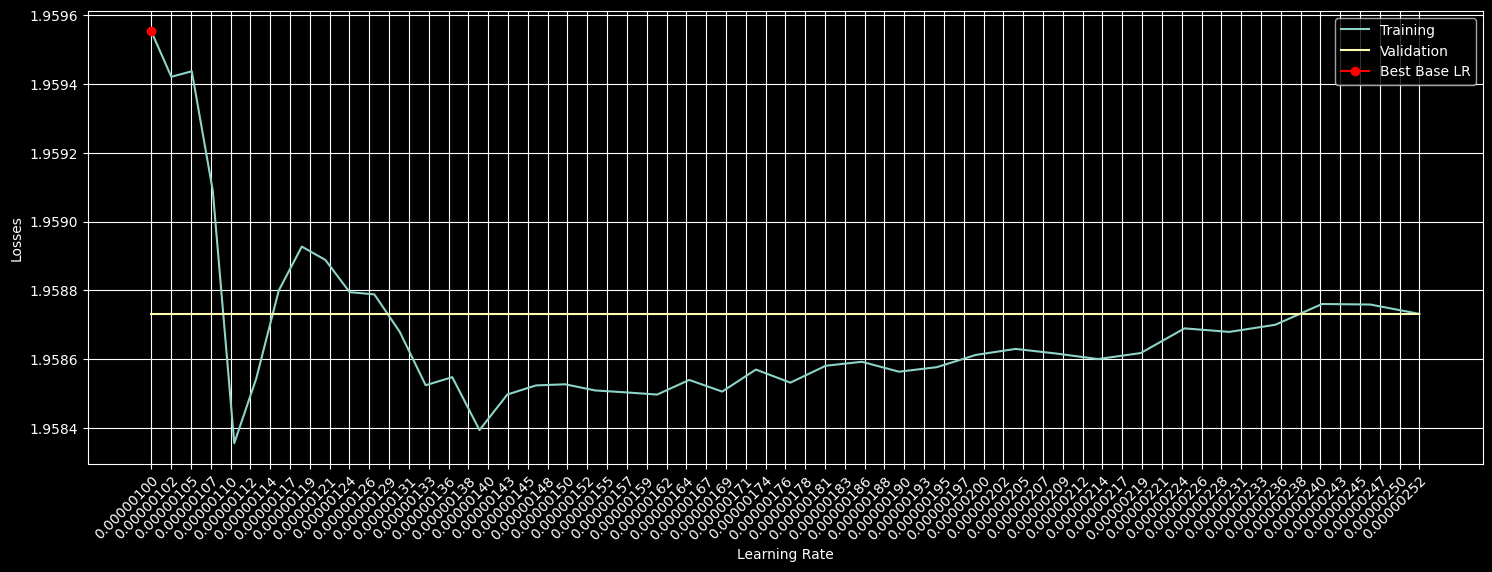

In [5]:
import os, json, time
from datasets import DatasetWrapper
from models import get_model
from utils.lr_finder import LRFinder
from datasets import get_dataset
from trainers import get_trainer

def save_log(history, val_metric: str=None):
    logs = { 'history': history }

    if val_metric != None:
        logs['best_acc'] = max(history[val_metric])
        print('Best score: ', logs['best_acc'])

    logfile_name = f'logs/qnet-{int(time.time())}.json'
    os.makedirs(os.path.dirname(logfile_name), exist_ok=True)
    with open(logfile_name, 'w') as f:
        json.dump(logs, f, indent=4)
    print('Log file saved at: ', logfile_name)

class Args:
    lr = 0
    batch_size = 256
    seq_len = 8
    epochs = 1
    model = 'qnet'
    embed_size = 1
    num_blocks = 1
    qnet_depth = 1
    lr_finder = [4,40,'logs/lr_finder']

# fitting = get_trainer('classification').train(Args(), get_dataset('stackoverflow'))
# save_log(fitting.history, 'val_categorical_accuracy')
# fitting = get_trainer('classification').train(Args(), get_dataset('colbert'))
# save_log(fitting.history, 'val_binary_accuracy')
# fitting = get_trainer('regression').train(Args(), get_dataset('rentrunway'))
# save_log(fitting.history)
fitting = get_trainer('ner').train(Args(), get_dataset('msra'))
save_log(fitting.history)